<a href="https://colab.research.google.com/github/jo-cho/advances_in_financial_machine_learning/blob/master/Chapter_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<< Exercises >>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## 1. 
Why is bagging based on random sampling with replacement? Would bagging still reduce a forecast’s variance if sampling were without replacement?

--------
### What is bagging?

Given a standard training set $D$ of size n, bagging generates m new training sets $D_{i}$, each of size n′, by sampling from $D$ uniformly and with replacement.

By sampling with replacement, some observations may be repeated in each $D_{i}$. If $n′=n$, then for large n the set $D_{i}$ is expected to have the fraction $(1 - 1/e) (≈63.2%)$ of the unique examples of $D$, the rest being duplicates.

This kind of sample is known as a bootstrap sample. Then, m models are fitted using the above m bootstrap samples and combined by averaging the output (for regression) or voting (for classification)

---------
### Why replacement?

Think of bias and variance as the two components of error of a classifier. Informally, the variance of a classifier is “given a different sample of training data, how much will my classifier’s performance be affected”, and bias is “for a given training set, how well does the classifier generalize over unseen examples.”

The same theoretical property is not true if you sample without replacement, because sampling without replacement would lead to pretty high variance. (overfit)

## 2.
Suppose that your training set is based on highly overlap labels (i.e., with low
uniqueness, as defined in Chapter 4).

(a) Does this make bagging prone to overfitting, or just ineffective? Why?

(b) Is out-of-bag accuracy generally reliable in financial applications? Why?

-----------
### Higly overlap labels vs. Bagging


(In Chapter 4),

When sampling with replacement (bootstrap), it becomes increasingly likely that in-bag observations will be (1) redundant to each other, and (2) very similar to out-of-bag observations.

Redundancy of draws makes the bootstrap inefficient. For example, in the case of a random forest, all trees in the forest will essentially be very similar copies of a single overfit decision tree. And because the random sampling makes out-of-bag examples very similar to the in-bag ones, out-of-bag accuracy will be grossly inflated.

## 3.

Build an ensemble of estimators, where the base estimator is a decision tree.

(a) How is this ensemble different from an RF?

(b) Using sklearn, produce a bagging classifier that behaves like an RF. What
parameters did you have to set up, and how?

----------------
## Ensemble of estimators (base = a decision tree) vs. Random Forest

In [0]:
from sklearn.datasets import make_classification #examples
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
X, y  = make_classification(random_state=1)

In [0]:
# 전자

clf1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), oob_score=True)

# 후자 (RF)

clf2 = RandomForestClassifier(oob_score=True, random_state=1)

In [25]:
clf1.fit(X,y)
clf2.fit(X,y)

print( clf1.oob_score_, 'vs', clf2.oob_score_)

0.96 vs 0.91


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------
RF shares some similarities with bagging, in the sense of training independently
individual estimators over bootstrapped subsets of the data. 

**The key difference with bagging is that random forests incorporate a second level of randomness**: When optimizing each node split, only a random subsample (without replacement) of the attributes will be evaluated, with the purpose of further decorrelating the estimators.

---------
-Advantages of RF

Like bagging, RF reduces forecasts’ variance without overfitting (remember, as
long as 𝜌̄ < 1). A second advantage is that RF evaluates feature importance, which
we will discuss in depth in Chapter 8.A third advantage is that RF provides out-of-bag
accuracy estimates, however in financial applications they are likely to be inflated (as
discussed in Section 6.3.3). But like bagging, RF will not necessarily exhibit lower
bias than individual decision trees.

------------
Unlike bagging, RF always fixes the size of the bootstrapped
samples to match the size of the training dataset.

In [0]:
# Make it smae as RF
## the key difference is split it radomly!

clf3 = BaggingClassifier(base_estimator=DecisionTreeClassifier(splitter='random'), oob_score=True, random_state=1)

In [26]:
clf3.fit(X,y)

print( clf2.oob_score_, 'vs', clf3.oob_score_)

0.91 vs 0.95


## 4.
Consider the relation between an RF, the number of trees it is composed of, and
the number of features utilized:

(a) Could you envision a relation between the minimum number of trees needed
in an RF and the number of features utilized?

(b) Could the number of trees be too small for the number of features used?

(c) Could the number of trees be too high for the number of observations available?

--------------------
## RF. number of features(dimensionality) vs. number of trees vs. number of observations available


In general, the more trees you use the better get the results. However, the improvement decreases as the number of trees increases, i.e. at a certain point the benefit in prediction performance from learning more trees will be lower than the cost in computation time for learning these additional trees.

 If the number of observations is large, but the number of trees is too small, then some observations will be predicted only once or even not at all. If the number of predictors is large but the number of trees is too small, then some features can (theoretically) be missed in all subspaces used. Both cases results in the decrease of random forest predictive power. But the last is a rather extreme case, since the selection of subspace is performed at each node

"... Hence, the convergence rate of the error rate
curve is not directly dependent on the number of observations n or the number of features,
but these characteristics could influence the empirical distribution of the εi
’s and hence
possibly the convergence rate as outlined in Section 4.3.1."

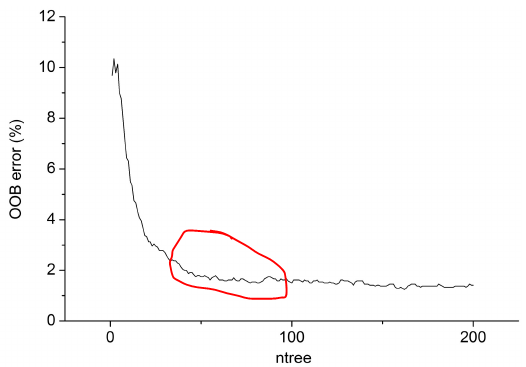

In [30]:
from PIL import Image
Image.open('/content/ZGAzA.png')

max_samples : avg uniqness

max_features : PCA..or whaterver 

## 5. 
How is out-of-bag accuracy different from stratified k-fold (with shuffling) crossvalidation accuracy? 

-------------

 The out-of-bag error is an error estimation technique often used to evaluate the accuracy of a random forest and to select appropriate values for tuning parameters

However, for binary classification problems with metric predictors it has been shown that the out-of-bag error can overestimate the true prediction error depending on the choices of random forests parameters.

https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710

As compared to the validation score OOB score is computed on data that was not necessarily used in the analysis of the model. Whereas for calculation validation score, a part of the original training dataset is actually set aside before training the models. Additionally, the OOB score is calculated using only a subset of DTs not containing the OOB sample in their bootstrap training dataset. While the validation score is calculated using all the DTs of the ensemble.

#참고


### 1.

https://en.wikipedia.org/wiki/Bootstrap_aggregating

https://www.quora.com/Why-does-random-forest-use-sampling-with-replacement-instead-of-without-replacement

### 2,3.  
The book

### 4.

Probst, Philipp, and Anne-Laure Boulesteix. "To Tune or Not to Tune the Number of Trees in Random Forest." Journal of Machine Learning Research 18 (2017): 181-1.

https://stats.stackexchange.com/questions/36165/does-the-optimal-number-of-trees-in-a-random-forest-depend-on-the-number-of-pred/36183

https://www.researchgate.net/post/How_to_determine_the_number_of_trees_to_be_generated_in_Random_Forest_algorithm

### 5.

https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0201904